In [14]:
#%pip install statsmodels
#%pip install warnings

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 5
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('TimeSeries.csv')

In [16]:
df.shape

(204, 2)

In [36]:
df.set_index('Date', inplace=True)

In [37]:
df.head(5)

,Value
Date,
01-07-1991,3.526591
01-08-1991,3.180891
01-09-1991,3.252221
01-10-1991,3.611003
01-11-1991,3.565869


In [74]:
df1 = df.copy()

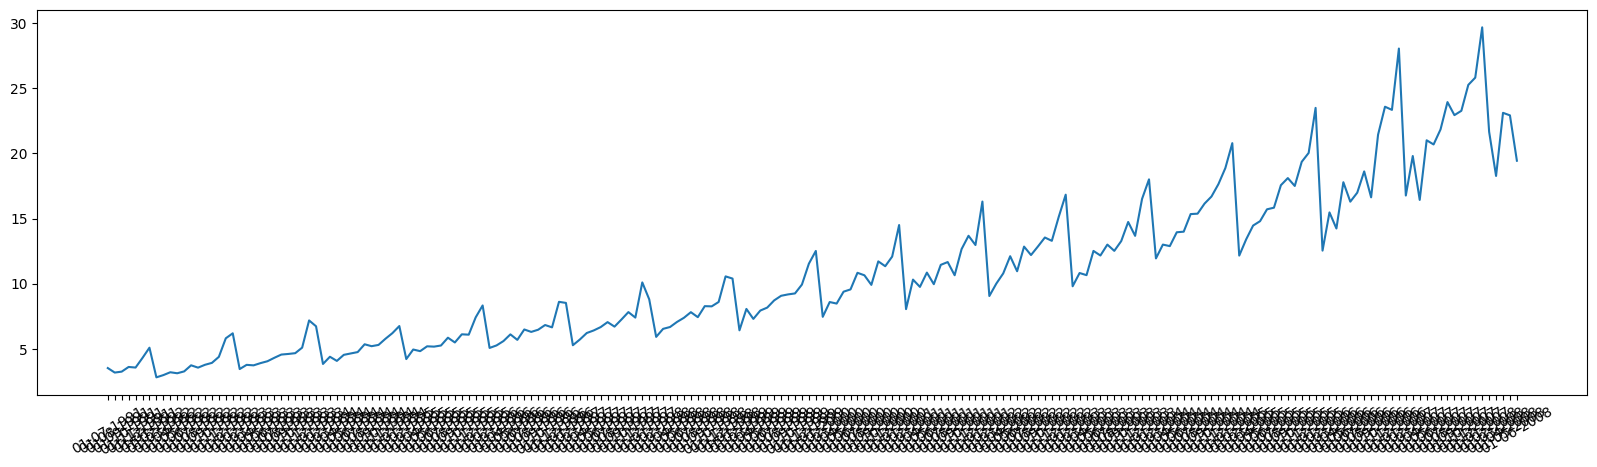

In [75]:
plt.plot(df1.index, df1['Value'])
plt.xticks(rotation=30)
plt.show()

# MOVING AVERAGE METHOD

In [76]:
rollingseries = df1['Value'].rolling(window=7)
rollingmean = rollingseries.mean()
rollingmean.head(6)

Date
01-07-1991   NaN
01-08-1991   NaN
01-09-1991   NaN
01-10-1991   NaN
01-11-1991   NaN
01-12-1991   NaN
Name: Value, dtype: float64

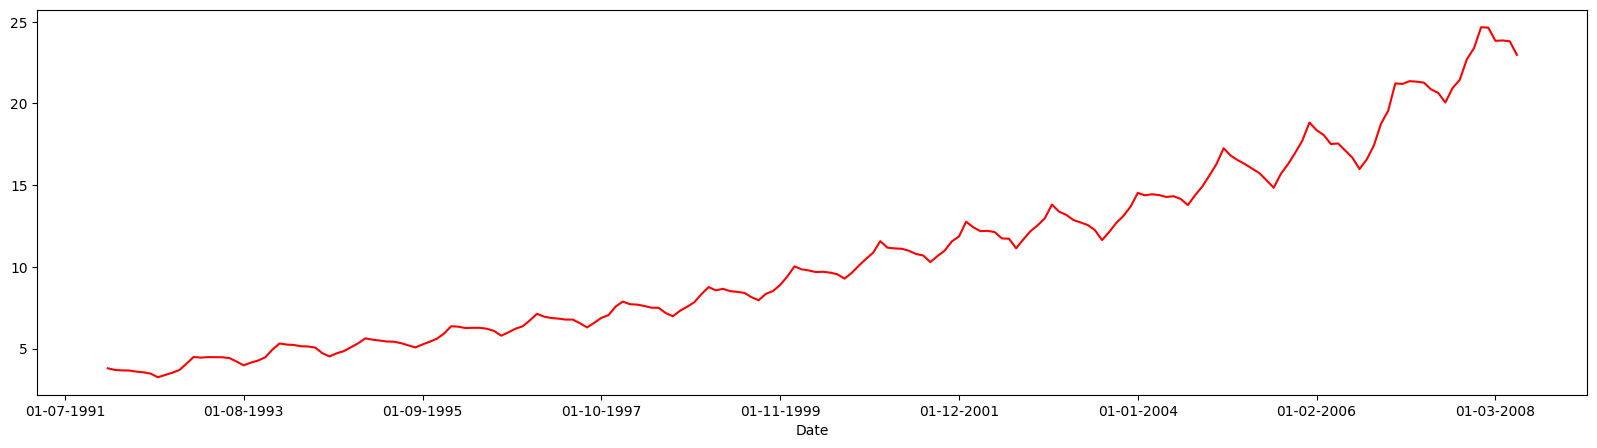

In [77]:
rollingmean.plot(color='red')
plt.show()

# SIMPLE EXPONENTIAL SMOOTHING

In [78]:
df2 = df.copy()

In [79]:
fit1 = SimpleExpSmoothing(df2).fit(smoothing_level=0.2,optimized=False)
fit2 = SimpleExpSmoothing(df2).fit(smoothing_level=0.8,optimized=False)

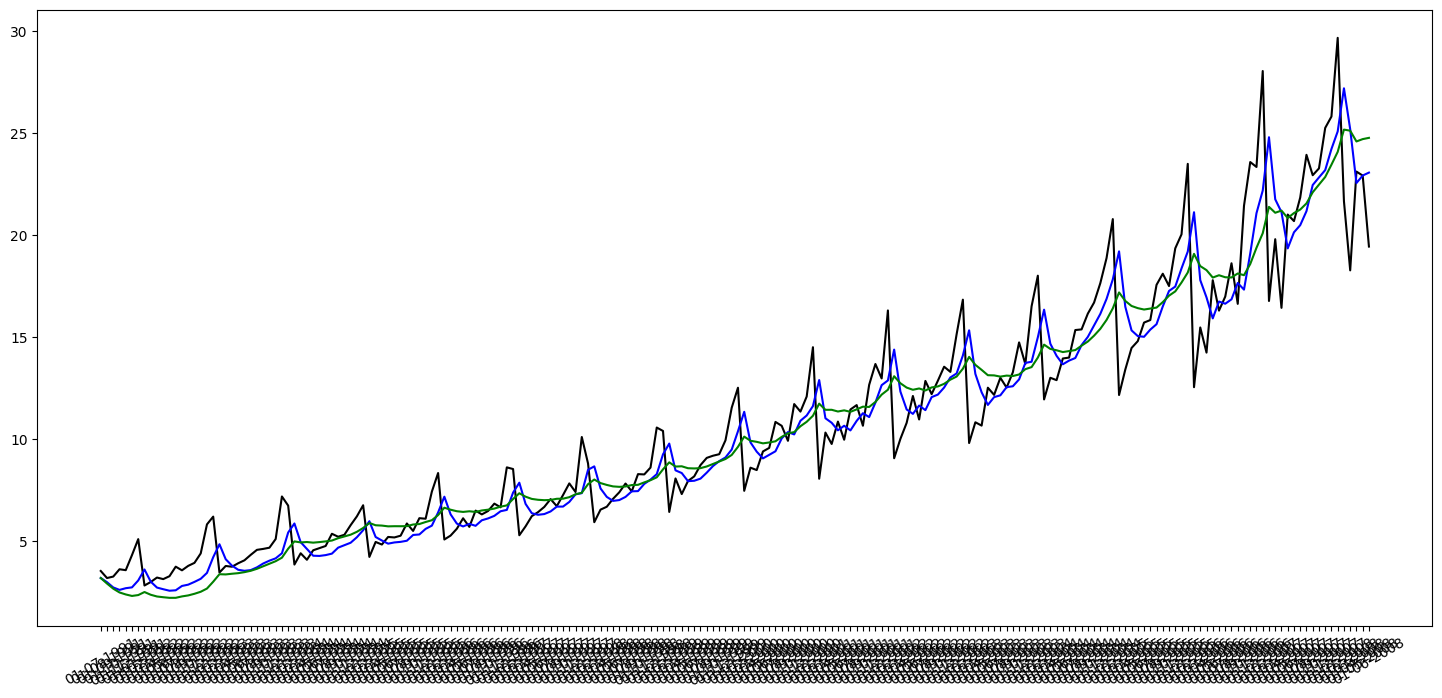

In [86]:
plt.figure(figsize=(18,8))
plt.plot(df2, color='black')
plt.xticks(rotation=30)

plt.plot(fit1.fittedvalues, color='blue')
plt.plot(fit2.fittedvalues, color='green')

# HOLT METHOD 

In [87]:
fit1 = Holt(df2).fit() # Linear Trend
fit2 = Holt(df2, exponential=True).fit() # Exponential Trend

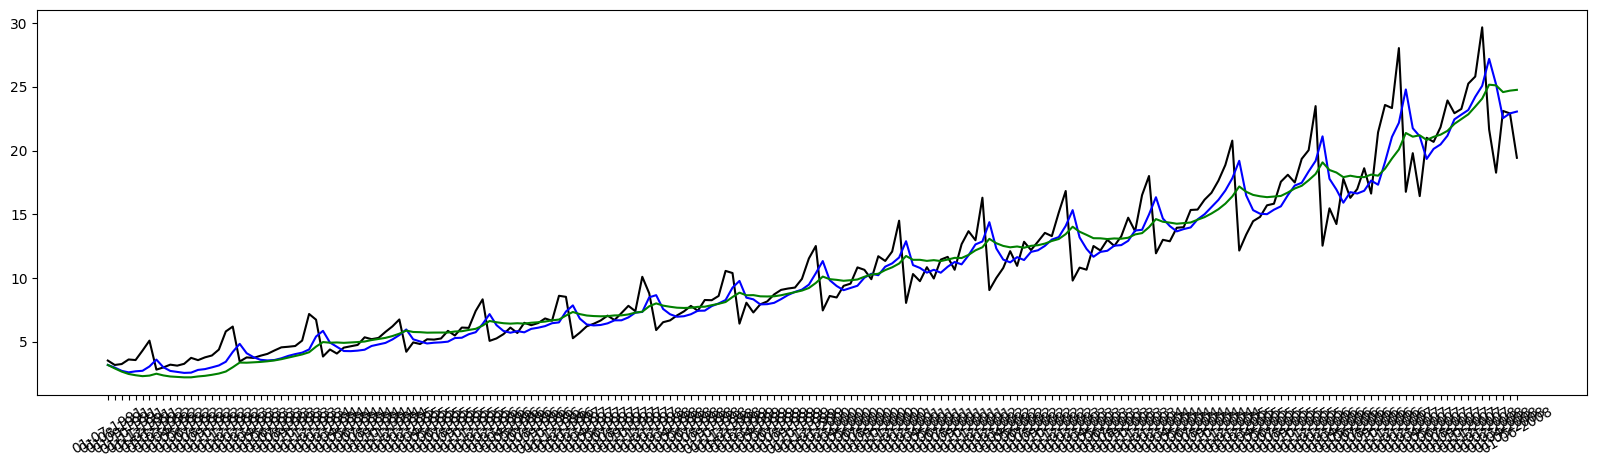

In [89]:
plt.plot(df2, color='black')
plt.xticks(rotation=30)

plt.plot(fit1.fittedvalues, color='blue')
plt.plot(fit2.fittedvalues, color='green')